In [48]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["normal", "anomaly"]

In [49]:
data = pd.read_csv('Train_data.csv',sep=',')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,normal,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [52]:
def encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

encode(data)


In [53]:
# Select the 'service' and 'flag' columns
col = data[['service', 'flag']]

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder to the 'service' column
le.fit(col['service'])

# Transform the 'service' column to numeric values
col['service'] = le.transform(col['service'])

# Fit the label encoder to the 'flag' column
le.fit(col['flag'])

# Transform the 'flag' column to numeric values
col['flag'] = le.transform(col['flag'])

# Replace the original columns with the numeric columns
data[['service', 'flag']] = col

C:\Users\sonal mishra\AppData\Local\Temp\ipykernel_10480\2999862332.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['service'] = le.transform(col['service'])
C:\Users\sonal mishra\AppData\Local\Temp\ipykernel_10480\2999862332.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['flag'] = le.transform(col['flag'])


In [54]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,40,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [55]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["class"]]
# Store the variable we are predicting 
target = "class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(25192, 42)
(25192,)


In [56]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

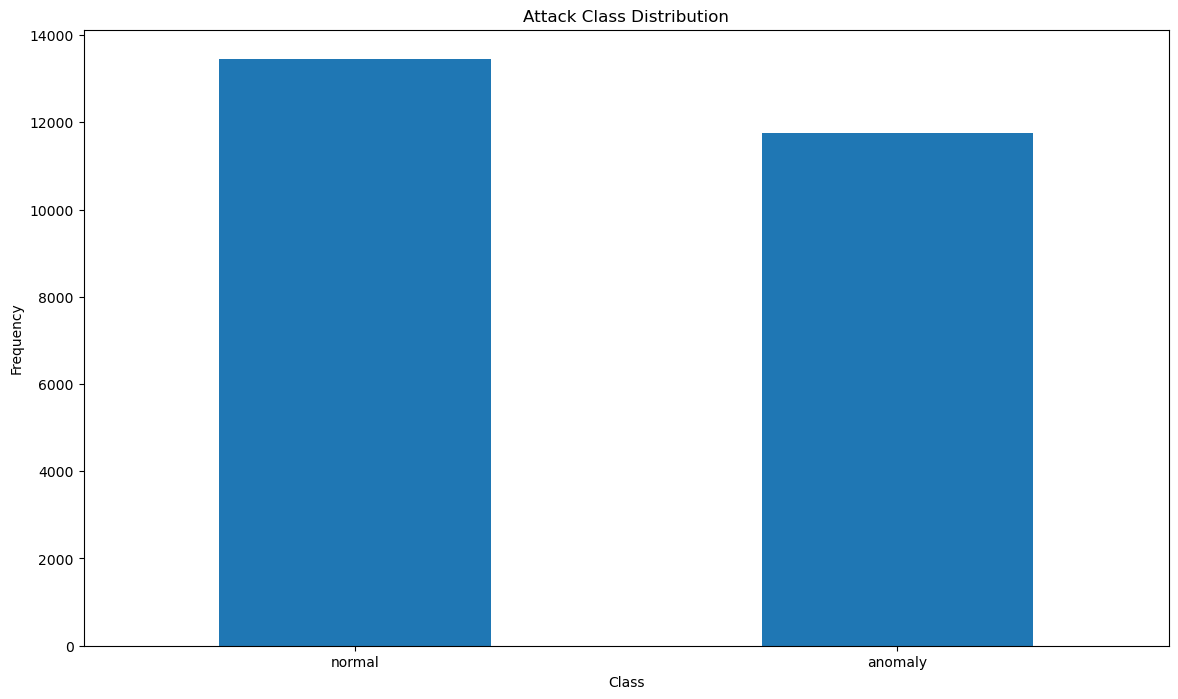

In [57]:
count_classes = pd.value_counts(data['class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Attack Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [58]:
anomaly = data[data['class']==0]

normal = data[data['class']==1]

In [59]:
print(fraud.shape,normal.shape)

(13449, 41) (13449, 42)


In [34]:
!pip install imblearn

In [35]:
from imblearn.under_sampling import NearMiss

In [36]:
!pip install imbalanced-learn

In [60]:
from imblearn.under_sampling import NearMiss

In [61]:
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [62]:
X_res.shape,y_res.shape

((23486, 42), (23486,))

In [63]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 13449, 0: 11743})
Resampled dataset shape Counter({0: 11743, 1: 11743})


In [65]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,40,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [66]:
data.shape

(25192, 42)

In [71]:
import pandas as pd

# Save resampled dataset in CSV format
df_resampled = pd.DataFrame(list(y_res))
df_resampled.to_csv('resampled_data.csv', index=False)

In [72]:
import pandas as pd

# Save resampled data in CSV format
df_resampled.to_csv('resampled_data.csv', index=False)

In [73]:
print('Class distribution of Training set:')
print(data['class'].value_counts())

Class distribution of Training set:
1    13449
0    11743
Name: class, dtype: int64


In [74]:
import pandas as pd

# Show the first 5 rows of the balanced data
print(pd.concat([df_balanced[columns], df_balanced[target]], axis=1).head())

NameError: name 'df_balanced' is not defined